In [3]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

In [4]:
p = "/home/aarav/nocturne_lab/data/example_scenario.json"
with open(p) as f:
    data = json.load(f)

In [5]:
meanx = 1306.09
meany = -10719.6

In [6]:
for obj in data['objects']:
    for position in obj['position']:
        position['x'] -= meanx
        position['y'] -= meany

for road in data['roads']:
    for position in road['geometry']:
        position['x'] -= meanx
        position['y'] -= meany


In [7]:
roads = data["roads"]
df = pd.DataFrame(roads)
df = df[(df['type']=='road_edge')|(df['type']=='lane')]

In [8]:
roads = pd.DataFrame(roads)

In [9]:
roads.type.unique()

array(['road_edge', 'road_line', 'lane', 'speed_bump', 'stop_sign'],
      dtype=object)

In [10]:
# Flatten the lists
flattened_data = []
for i, row in df.iterrows():
    d = []
    for point in row['geometry']:
        d.append({'x': point['x'], 'y': point['y'], 'type': row['type']})
    flattened_data.append(pd.DataFrame(d))
# flattened_df = pd.DataFrame(flattened_data)

In [11]:

def plot_road_edge(flattened_data, objs=None, roads = None, ctr = 100000, title=""):
    plt.figure(figsize=(5, 3), dpi=100)
    i = 0
    for flattened_df in flattened_data:
        plt.plot(flattened_df['x'], flattened_df['y'], '-', color='blue' ,linewidth=0.5)
        i += 1
        if(i >= ctr):
            break

    if objs is not None:
        for obj in objs:
            if(obj['type'] == 'vehicle'):
                for i in range(len(obj['position'])):
                    if(obj['valid'][i]):
                        if(obj['position'][i]['x'] > 200):
                            continue
                        plt.plot(obj['position'][i]['x'], obj['position'][i]['y'], 'o', color='red', markersize=1)
                        print(obj['position'][i]['x'], obj['position'][i]['y'])
                        break
    
    if roads is not None:
        for idx, road in roads.iterrows():
            if(road['type'] == 'stop_sign'):
                for i in range(len(road['geometry'])):
                    print(road['geometry'][i]['x'], road['geometry'][i]['y'])
                    plt.plot(road['geometry'][i]['x'], road['geometry'][i]['y'], 'o', color='green', markersize=1)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    # plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [12]:
# num_points = {}

# sum = 0
# for df_ in flattened_data:
#     sum += len(df_)
# num_points[thresh] = sum
# plot_road_edge(flattened_data, title="Threshold: None, Total points sampled: {}".format(sum))

# plt.bar(num_points.keys(), num_points.values())

In [13]:
# # Flatten the lists
# flattened_data = []
# for i, row in df.iterrows():
#     d = []
#     start = 0
#     end = -1
#     num_points = len(row['geometry'])
#     j = 0
#     while True:
#         x1,y1 = row['geometry'][j]['x'], row['geometry'][j]['y']
#         x2, y2 = row['geometry'][j+1]['x'], row['geometry'][j+1]['y']
#         x3, y3 = row['geometry'][j+2]['x'], row['geometry'][j+2]['y']
#         shoelace_area = abs((x1-x3)*(y2-y1)-(x1-x2)*(y3-y1))
#         if shoelace_area < 1e-7:
#             end = j+2
#             j += 1
#         else:
#             if(end != -1):
#                 d.append({'x': row['geometry'][start]['x'], 'y': row['geometry'][start]['y']})
#                 d.append({'x': row['geometry'][end]['x'], 'y': row['geometry'][end]['y']})
#                 end = -1
#             d.append({'x': row['geometry'][j]['x'], 'y': row['geometry'][j]['y']})
#             d.append({'x': row['geometry'][j+1]['x'], 'y': row['geometry'][j+1]['y']})
#             j += 1
#         if j >= num_points - 2:
#             break
#     if(end != -1):
#         d.append({'x': row['geometry'][start]['x'], 'y': row['geometry'][start]['y']})
#         d.append({'x': row['geometry'][end]['x'], 'y': row['geometry'][end]['y']})
#     flattened_data.append(pd.DataFrame(d))
# # flattened_df = pd.DataFrame(flattened_data)

In [14]:
# def return_flattened_data(threshold = 0.0):
#     flattened_data = []

#     for _, row in df.iterrows():
#         num_points = len(row['geometry'])
        
#         if num_points < 3:  # Handle rows with fewer than 3 points
#             flattened_data.append(pd.DataFrame(row['geometry']))
#             continue
        
#         d = []  # Temporary list to store the flattened points for current row
#         start = 0  # Starting index of collinear sequence
#         j = 0  # Current index in point list
        
#         while j < num_points - 2:
#             x1, y1 = row['geometry'][j]['x'], row['geometry'][j]['y']
#             x2, y2 = row['geometry'][j + 1]['x'], row['geometry'][j + 1]['y']
#             x3, y3 = row['geometry'][j + 2]['x'], row['geometry'][j + 2]['y']
            
#             # Calculate the shoelace area for the triplet
#             shoelace_area = 0.5 * abs((x1 - x3) * (y2 - y1) - (x1 - x2) * (y3 - y1))
            
#             # If the points are collinear
#             if shoelace_area < threshold:
#                 j += 1
#             else:
#                 if j != start:  # If there was a collinear sequence before
#                     d.append({'x': row['geometry'][start]['x'], 'y': row['geometry'][start]['y']})
#                     d.append({'x': row['geometry'][j]['x'], 'y': row['geometry'][j]['y']})
#                     start = j + 1  # Update the start index
#                     j += 1  # Skip to the next point pair
#                 else:  # No collinear sequence, add the individual points
#                     d.append({'x': x1, 'y': y1})
#                     d.append({'x': x2, 'y': y2})
#                     start = j + 2  # Update the start index
#                     j += 2  # Skip to the next point pair
        
#         # Handle the last two points if they are part of a collinear sequence
#         if j == num_points - 2 and start != j:
#             d.append({'x': row['geometry'][start]['x'], 'y': row['geometry'][start][ 'y']})
#             d.append({'x': row['geometry'][j]['x'], 'y': row['geometry'][j]['y']})
#         elif j == num_points - 2:
#             d.append({'x': row['geometry'][j]['x'], 'y': row['geometry'][j]['y']})
#             d.append({'x': row['geometry'][j + 1]['x'], 'y': row['geometry'][j + 1]['y']})
        
#         flattened_data.append(pd.DataFrame(d))
#     return flattened_data

In [15]:
def return_flattened_data(threshold = 0.0):
    flattened_data = []

    for _, row in tqdm(df.iterrows()):
        num_points = len(row['geometry'])
        
        if num_points < 3:  # Handle rows with fewer than 3 points
            flattened_data.append(pd.DataFrame(row['geometry']))
            continue
        
        d = []  # Temporary list to store the flattened points for current row
        start = 0  # Starting index of collinear sequence
        j = 0  # Current index in point list
        i = 0
        skipList = [False for i in range(num_points)]
        skipChanged = True
        while(skipChanged):
            skipChanged = False
            j = 0
            while j < num_points - 1:
                j_1 = j + 1
                while(j_1 < num_points - 1 and skipList[j_1]):
                    j_1 += 1
                if(j_1 == num_points - 1):
                    break
                j_2 = j_1 + 1
                while(j_2 < num_points and skipList[j_2]):
                    j_2 += 1
                if(j_2 == num_points):
                    break
                x1, y1 = row['geometry'][j]['x'], row['geometry'][j]['y']
                x2, y2 = row['geometry'][j_1]['x'], row['geometry'][j_1]['y']
                x3, y3 = row['geometry'][j_2]['x'], row['geometry'][j_2]['y']
                
                # Calculate the shoelace area for the triplet
                shoelace_area = 0.5 * abs((x1 - x3) * (y2 - y1) - (x1 - x2) * (y3 - y1))
                
                # If the points are collinear
                if shoelace_area < threshold:
                    skipList[j_1] = True
                    j = j_2
                    skipChanged = True
                else:
                    j = j_1
            i += 1
        j = 0
        while j < num_points:
            if(skipList[j]):
                j += 1
                continue
            d.append({'x': row['geometry'][j]['x'], 'y': row['geometry'][j]['y']})
            j+=1
        flattened_data.append(pd.DataFrame(d))
    return flattened_data

  0%|          | 0/18 [00:00<?, ?it/s]

0.1


0it [00:00, ?it/s]

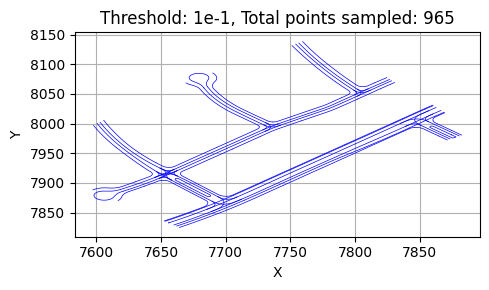

0.01


0it [00:00, ?it/s]

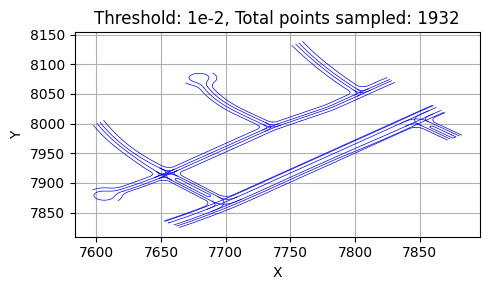

0.001


0it [00:00, ?it/s]

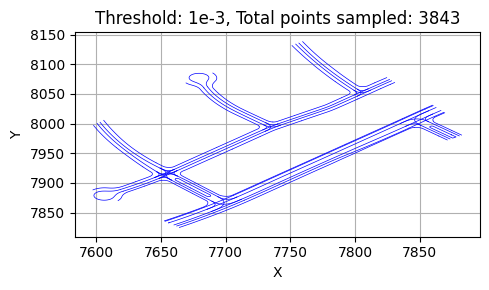

0.0001


0it [00:00, ?it/s]

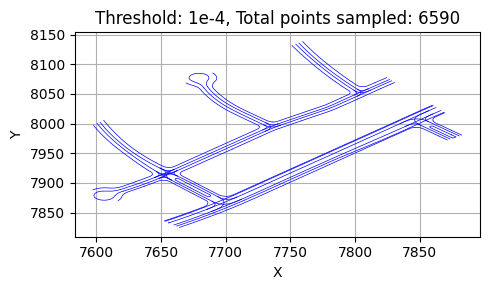

1e-05


0it [00:00, ?it/s]

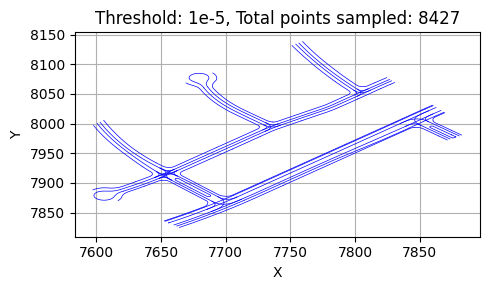

1e-06


0it [00:00, ?it/s]

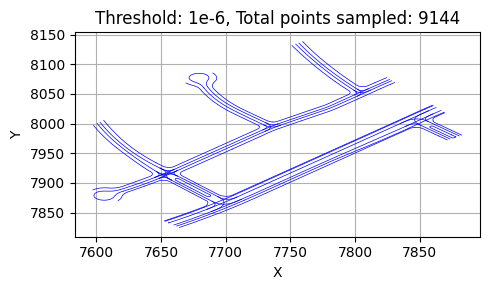

1e-07


0it [00:00, ?it/s]

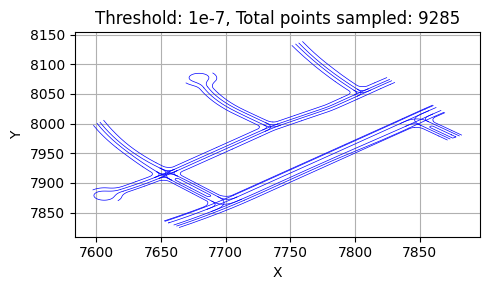

1e-08


0it [00:00, ?it/s]

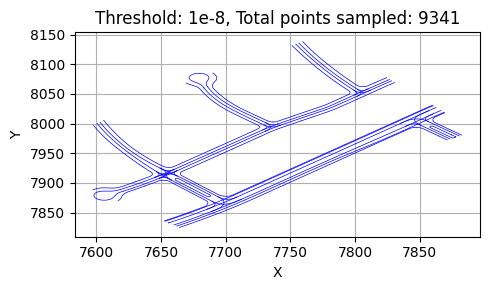

1e-09


0it [00:00, ?it/s]

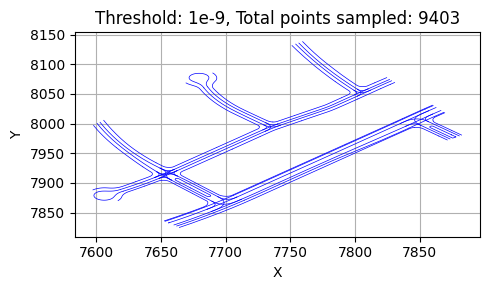

1e-10


0it [00:00, ?it/s]

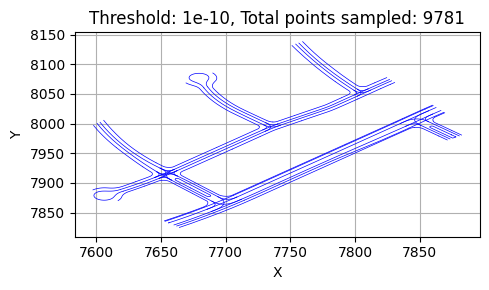

1e-11


0it [00:00, ?it/s]

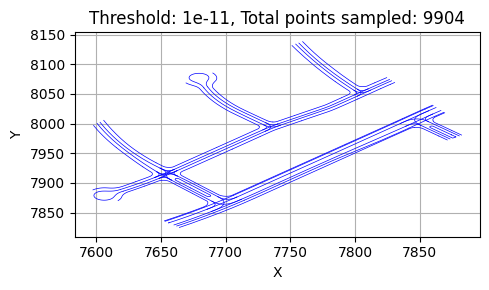

1e-12


0it [00:00, ?it/s]

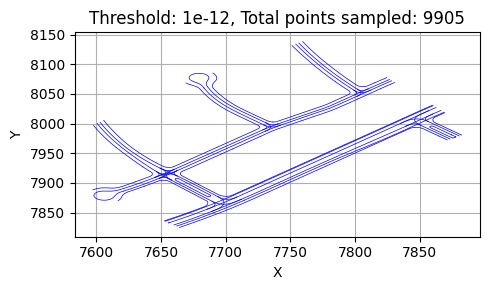

1e-13


0it [00:00, ?it/s]

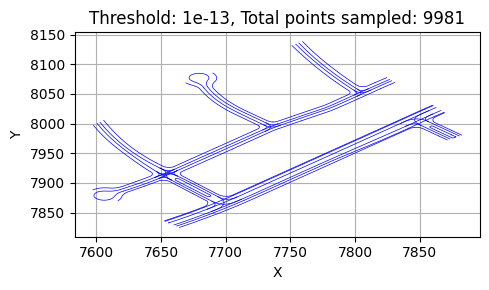

1e-14


0it [00:00, ?it/s]

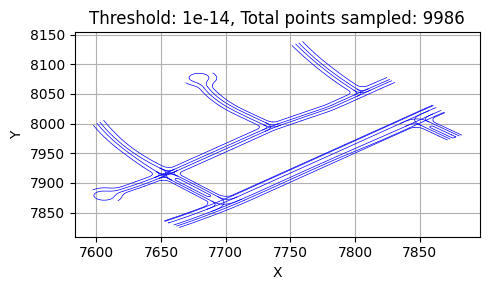

1e-15


0it [00:00, ?it/s]

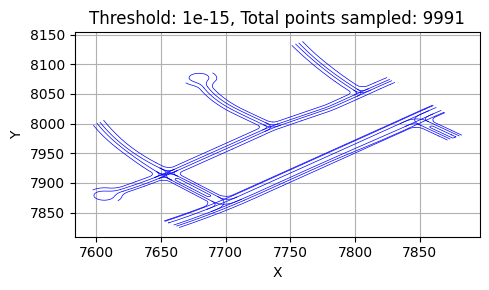

1e-16


0it [00:00, ?it/s]

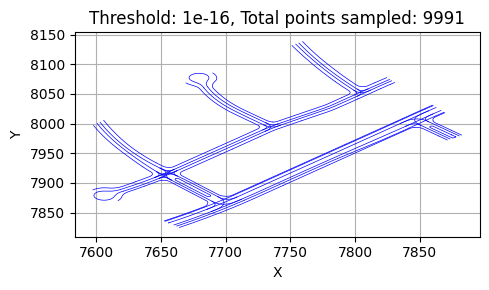

1e-17


0it [00:00, ?it/s]

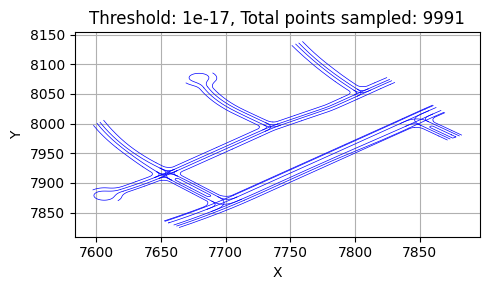

1e-18


0it [00:00, ?it/s]

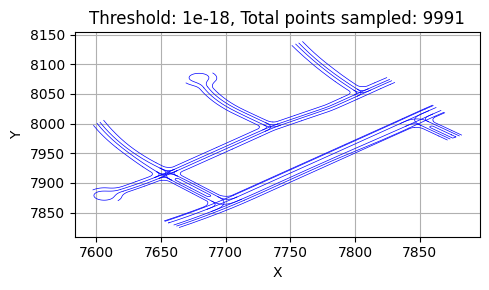

<BarContainer object of 18 artists>

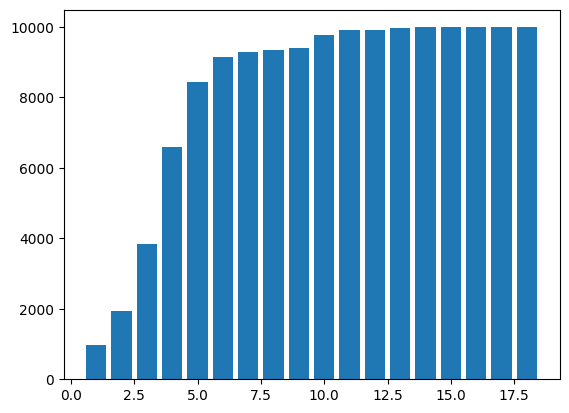

In [16]:
num_points = {}
for thresh in tqdm(range(1,19)):
    print(1/(10**thresh))
    flattened_data = return_flattened_data(threshold = 1/(10**thresh))
    sum = 0
    for df_ in flattened_data:
        sum += len(df_)
    num_points[thresh] = sum
    plot_road_edge(flattened_data, title="Threshold: 1e-{}, Total points sampled: {}".format(thresh, sum))

plt.bar(num_points.keys(), num_points.values())

0it [00:00, ?it/s]

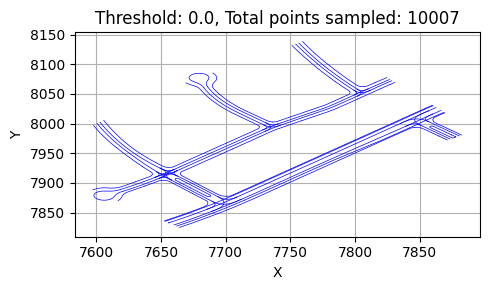

In [31]:
thresh = 0.0
flattened_data = return_flattened_data(threshold = thresh)
sum = 0
for df_ in flattened_data:
    sum += len(df_)
plot_road_edge(flattened_data, title="Threshold: {}, Total points sampled: {}".format(thresh, sum))

In [ ]:
for idx, road in roads.iterrows():
    print(road['type'])
    break

road_edge
